<a href="https://colab.research.google.com/github/gomlfx/ApiaryFund/blob/master/AGC27_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [246]:
#License: GPL 
#Creator: Mike Smith https://github.com/gomlfx 
#designed for colab/kaggle/Jupyter

In [247]:
#!pip install autogluon
#!pip install --upgrade mxnet

In [248]:
import pandas as pd
import numpy as np
#import matplotlib for plotting 
import matplotlib.pyplot as plt
%matplotlib inline
#import normalization
from sklearn import preprocessing

#autogluon
from autogluon.tabular import TabularDataset, TabularPredictor

In [249]:
#metatrader5 file format
df=pd.read_table('/content/GBPUSD_Daily_199305120000_202205090000.csv')

In [250]:
print(df.head())
print(df.tail())
df.info()

       <DATE>  <OPEN>  <HIGH>   <LOW>  <CLOSE>  <TICKVOL>  <VOL>  <SPREAD>
0  1993.05.12  1.5370  1.5445  1.5290   1.5338       2781      0        50
1  1993.05.13  1.5328  1.5360  1.5180   1.5225       2571      0        50
2  1993.05.14  1.5228  1.5415  1.5200   1.5387       2711      0        50
3  1993.05.17  1.5365  1.5460  1.5309   1.5355       2921      0        50
4  1993.05.18  1.5350  1.5380  1.5237   1.5365       2711      0        50
          <DATE>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  <TICKVOL>  <VOL>  \
7533  2022.05.03  1.24896  1.25675  1.24703  1.24978      94693      0   
7534  2022.05.04  1.24979  1.26380  1.24510  1.26345     110968      0   
7535  2022.05.05  1.26260  1.26345  1.23251  1.23617     132758      0   
7536  2022.05.06  1.23616  1.23801  1.22757  1.23352     154425      0   
7537  2022.05.09  1.23475  1.23475  1.22668  1.22771      34023      0   

      <SPREAD>  
7533         0  
7534         0  
7535         0  
7536         0  
7537         0  
<cl

In [251]:
df

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,1993.05.12,1.53700,1.54450,1.52900,1.53380,2781,0,50
1,1993.05.13,1.53280,1.53600,1.51800,1.52250,2571,0,50
2,1993.05.14,1.52280,1.54150,1.52000,1.53870,2711,0,50
3,1993.05.17,1.53650,1.54600,1.53090,1.53550,2921,0,50
4,1993.05.18,1.53500,1.53800,1.52370,1.53650,2711,0,50
...,...,...,...,...,...,...,...,...
7533,2022.05.03,1.24896,1.25675,1.24703,1.24978,94693,0,0
7534,2022.05.04,1.24979,1.26380,1.24510,1.26345,110968,0,0
7535,2022.05.05,1.26260,1.26345,1.23251,1.23617,132758,0,0
7536,2022.05.06,1.23616,1.23801,1.22757,1.23352,154425,0,0


In [252]:
d = df[["<OPEN>","<HIGH>","<LOW>","<CLOSE>"]]
df = pd.DataFrame(data=d)
df

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,1.53700,1.54450,1.52900,1.53380
1,1.53280,1.53600,1.51800,1.52250
2,1.52280,1.54150,1.52000,1.53870
3,1.53650,1.54600,1.53090,1.53550
4,1.53500,1.53800,1.52370,1.53650
...,...,...,...,...
7533,1.24896,1.25675,1.24703,1.24978
7534,1.24979,1.26380,1.24510,1.26345
7535,1.26260,1.26345,1.23251,1.23617
7536,1.23616,1.23801,1.22757,1.23352


In [253]:
df_raw1 = pd.DataFrame(data=df)
df_raw1

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,1.53700,1.54450,1.52900,1.53380
1,1.53280,1.53600,1.51800,1.52250
2,1.52280,1.54150,1.52000,1.53870
3,1.53650,1.54600,1.53090,1.53550
4,1.53500,1.53800,1.52370,1.53650
...,...,...,...,...
7533,1.24896,1.25675,1.24703,1.24978
7534,1.24979,1.26380,1.24510,1.26345
7535,1.26260,1.26345,1.23251,1.23617
7536,1.23616,1.23801,1.22757,1.23352


In [254]:
df.rename({'<OPEN>':'p_o','<HIGH>':'p_h','<LOW>':'p_l','<CLOSE>':'p_c'}, axis='columns', inplace=True)

In [255]:
df.info

<bound method DataFrame.info of           p_o      p_h      p_l      p_c
0     1.53700  1.54450  1.52900  1.53380
1     1.53280  1.53600  1.51800  1.52250
2     1.52280  1.54150  1.52000  1.53870
3     1.53650  1.54600  1.53090  1.53550
4     1.53500  1.53800  1.52370  1.53650
...       ...      ...      ...      ...
7533  1.24896  1.25675  1.24703  1.24978
7534  1.24979  1.26380  1.24510  1.26345
7535  1.26260  1.26345  1.23251  1.23617
7536  1.23616  1.23801  1.22757  1.23352
7537  1.23475  1.23475  1.22668  1.22771

[7538 rows x 4 columns]>

In [256]:
print(df.columns)

Index(['p_o', 'p_h', 'p_l', 'p_c'], dtype='object')


In [257]:
#Features

#195 periods ago
df['p_Open_last_period195'] = df['p_o'].shift(195) 
df['p_High_last_period195'] = df['p_h'].shift(195)
df['p_Low_last_period195'] = df['p_l'].shift(195)
df['p_Close_last_period195'] = df['p_c'].shift(195)
#194 periods ago
df['p_Open_last_period194'] = df['p_o'].shift(194) 
df['p_High_last_period194'] = df['p_h'].shift(194)
df['p_Low_last_period194'] = df['p_l'].shift(194)
df['p_Close_last_period194'] = df['p_c'].shift(194)
#193 periods ago
df['p_Open_last_period193'] = df['p_o'].shift(193) 
df['p_High_last_period193'] = df['p_h'].shift(193)
df['p_Low_last_period193'] = df['p_l'].shift(193)
df['p_Close_last_period193'] = df['p_c'].shift(193)
#192 periods ago
df['p_Open_last_period192'] = df['p_o'].shift(192) 
df['p_High_last_period192'] = df['p_h'].shift(192)
df['p_Low_last_period192'] = df['p_l'].shift(192)
df['p_Close_last_period192'] = df['p_c'].shift(192)
#191 periods ago
df['p_Open_last_period191'] = df['p_o'].shift(191) 
df['p_High_last_period191'] = df['p_h'].shift(191)
df['p_Low_last_period191'] = df['p_l'].shift(191)
df['p_Close_last_period191'] = df['p_c'].shift(191)
#190 periods ago
df['p_Open_last_period190'] = df['p_o'].shift(190) 
df['p_High_last_period190'] = df['p_h'].shift(190)
df['p_Low_last_period190'] = df['p_l'].shift(190)
df['p_Close_last_period190'] = df['p_c'].shift(190)
#189 periods ago
df['p_Open_last_period189'] = df['p_o'].shift(189) 
df['p_High_last_period189'] = df['p_h'].shift(189)
df['p_Low_last_period189'] = df['p_l'].shift(189)
df['p_Close_last_period189'] = df['p_c'].shift(189)
#188 periods ago
df['p_Open_last_period188'] = df['p_o'].shift(188) 
df['p_High_last_period188'] = df['p_h'].shift(188)
df['p_Low_last_period188'] = df['p_l'].shift(188)
df['p_Close_last_period188'] = df['p_c'].shift(188)
#187 periods ago
df['p_Open_last_period187'] = df['p_o'].shift(187) 
df['p_High_last_period187'] = df['p_h'].shift(187)
df['p_Low_last_period187'] = df['p_l'].shift(187)
df['p_Close_last_period187'] = df['p_c'].shift(187)
#186 periods ago
df['p_Open_last_period186'] = df['p_o'].shift(186) 
df['p_High_last_period186'] = df['p_h'].shift(186)
df['p_Low_last_period186'] = df['p_l'].shift(186)
df['p_Close_last_period186'] = df['p_c'].shift(186)
#185 periods ago
df['p_Open_last_period185'] = df['p_o'].shift(185) 
df['p_High_last_period185'] = df['p_h'].shift(185)
df['p_Low_last_period185'] = df['p_l'].shift(185)
df['p_Close_last_period185'] = df['p_c'].shift(185)
#184 periods ago
df['p_Open_last_period184'] = df['p_o'].shift(184) 
df['p_High_last_period184'] = df['p_h'].shift(184)
df['p_Low_last_period184'] = df['p_l'].shift(184)
df['p_Close_last_period184'] = df['p_c'].shift(184)
#183 periods ago
df['p_Open_last_period183'] = df['p_o'].shift(183) 
df['p_High_last_period183'] = df['p_h'].shift(183)
df['p_Low_last_period183'] = df['p_l'].shift(183)
df['p_Close_last_period183'] = df['p_c'].shift(183)
#182 periods ago
df['p_Open_last_period182'] = df['p_o'].shift(182) 
df['p_High_last_period182'] = df['p_h'].shift(182)
df['p_Low_last_period182'] = df['p_l'].shift(182)
df['p_Close_last_period182'] = df['p_c'].shift(182)
#181 periods ago
df['p_Open_last_period181'] = df['p_o'].shift(181) 
df['p_High_last_period181'] = df['p_h'].shift(181)
df['p_Low_last_period181'] = df['p_l'].shift(181)
df['p_Close_last_period181'] = df['p_c'].shift(181)
#180 periods ago
df['p_Open_last_period180'] = df['p_o'].shift(180) 
df['p_High_last_period180'] = df['p_h'].shift(180)
df['p_Low_last_period180'] = df['p_l'].shift(180)
df['p_Close_last_period180'] = df['p_c'].shift(180)
#179 periods ago
df['p_Open_last_period179'] = df['p_o'].shift(179) 
df['p_High_last_period179'] = df['p_h'].shift(179)
df['p_Low_last_period179'] = df['p_l'].shift(179)
df['p_Close_last_period179'] = df['p_c'].shift(179)
#178 periods ago
df['p_Open_last_period178'] = df['p_o'].shift(178) 
df['p_High_last_period178'] = df['p_h'].shift(178)
df['p_Low_last_period178'] = df['p_l'].shift(178)
df['p_Close_last_period178'] = df['p_c'].shift(178)
#177 periods ago
df['p_Open_last_period177'] = df['p_o'].shift(177) 
df['p_High_last_period177'] = df['p_h'].shift(177)
df['p_Low_last_period177'] = df['p_l'].shift(177)
df['p_Close_last_period177'] = df['p_c'].shift(177)
#176 periods ago
df['p_Open_last_period176'] = df['p_o'].shift(176) 
df['p_High_last_period176'] = df['p_h'].shift(176)
df['p_Low_last_period176'] = df['p_l'].shift(176)
df['p_Close_last_period176'] = df['p_c'].shift(176)
#194 periods ago
df['p_Open_last_period175'] = df['p_o'].shift(175) 
df['p_High_last_period175'] = df['p_h'].shift(175)
df['p_Low_last_period175'] = df['p_l'].shift(175)
df['p_Close_last_period175'] = df['p_c'].shift(175)
#174 periods ago
df['p_Open_last_period174'] = df['p_o'].shift(174) 
df['p_High_last_period174'] = df['p_h'].shift(174)
df['p_Low_last_period174'] = df['p_l'].shift(174)
df['p_Close_last_period174'] = df['p_c'].shift(174)
#173 periods ago
df['p_Open_last_period173'] = df['p_o'].shift(173) 
df['p_High_last_period173'] = df['p_h'].shift(173)
df['p_Low_last_period173'] = df['p_l'].shift(173)
df['p_Close_last_period173'] = df['p_c'].shift(173)
#172 periods ago
df['p_Open_last_period172'] = df['p_o'].shift(172) 
df['p_High_last_period172'] = df['p_h'].shift(172)
df['p_Low_last_period172'] = df['p_l'].shift(172)
df['p_Close_last_period172'] = df['p_c'].shift(172)
#171 periods ago
df['p_Open_last_period171'] = df['p_o'].shift(171) 
df['p_High_last_period171'] = df['p_h'].shift(171)
df['p_Low_last_period171'] = df['p_l'].shift(171)
df['p_Close_last_period171'] = df['p_c'].shift(171)
#170 periods ago
df['p_Open_last_period170'] = df['p_o'].shift(170) 
df['p_High_last_period170'] = df['p_h'].shift(170)
df['p_Low_last_period170'] = df['p_l'].shift(170)
df['p_Close_last_period170'] = df['p_c'].shift(170)
#169 periods ago
df['p_Open_last_period169'] = df['p_o'].shift(169) 
df['p_High_last_period169'] = df['p_h'].shift(169)
df['p_Low_last_period169'] = df['p_l'].shift(169)
df['p_Close_last_period169'] = df['p_c'].shift(169)
#168 periods ago
df['p_Open_last_period168'] = df['p_o'].shift(168) 
df['p_High_last_period168'] = df['p_h'].shift(168)
df['p_Low_last_period168'] = df['p_l'].shift(168)
df['p_Close_last_period168'] = df['p_c'].shift(168)
#167 periods ago
df['p_Open_last_period167'] = df['p_o'].shift(167) 
df['p_High_last_period167'] = df['p_h'].shift(167)
df['p_Low_last_period167'] = df['p_l'].shift(167)
df['p_Close_last_period167'] = df['p_c'].shift(167)
#166 periods ago
df['p_Open_last_period166'] = df['p_o'].shift(166) 
df['p_High_last_period166'] = df['p_h'].shift(166)
df['p_Low_last_period166'] = df['p_l'].shift(166)
df['p_Close_last_period166'] = df['p_c'].shift(166)
#165 periods ago
df['p_Open_last_period165'] = df['p_o'].shift(165) 
df['p_High_last_period165'] = df['p_h'].shift(165)
df['p_Low_last_period165'] = df['p_l'].shift(165)
df['p_Close_last_period165'] = df['p_c'].shift(165)
#164 periods ago
df['p_Open_last_period164'] = df['p_o'].shift(164) 
df['p_High_last_period164'] = df['p_h'].shift(164)
df['p_Low_last_period164'] = df['p_l'].shift(164)
df['p_Close_last_period164'] = df['p_c'].shift(164)
#163 periods ago
df['p_Open_last_period163'] = df['p_o'].shift(163) 
df['p_High_last_period163'] = df['p_h'].shift(163)
df['p_Low_last_period163'] = df['p_l'].shift(163)
df['p_Close_last_period163'] = df['p_c'].shift(163)
#162 periods ago
df['p_Open_last_period162'] = df['p_o'].shift(162) 
df['p_High_last_period162'] = df['p_h'].shift(162)
df['p_Low_last_period162'] = df['p_l'].shift(162)
df['p_Close_last_period162'] = df['p_c'].shift(162)
#161 periods ago
df['p_Open_last_period161'] = df['p_o'].shift(161) 
df['p_High_last_period161'] = df['p_h'].shift(161)
df['p_Low_last_period161'] = df['p_l'].shift(161)
df['p_Close_last_period161'] = df['p_c'].shift(161)
#160 periods ago
df['p_Open_last_period160'] = df['p_o'].shift(160) 
df['p_High_last_period160'] = df['p_h'].shift(160)
df['p_Low_last_period160'] = df['p_l'].shift(160)
df['p_Close_last_period160'] = df['p_c'].shift(160)
#59 periods ago
df['p_Open_last_period159'] = df['p_o'].shift(159) 
df['p_High_last_period159'] = df['p_h'].shift(159)
df['p_Low_last_period159'] = df['p_l'].shift(159)
df['p_Close_last_period159'] = df['p_c'].shift(159)
#158 periods ago
df['p_Open_last_period158'] = df['p_o'].shift(158) 
df['p_High_last_period158'] = df['p_h'].shift(158)
df['p_Low_last_period158'] = df['p_l'].shift(158)
df['p_Close_last_period158'] = df['p_c'].shift(158)
#157 periods ago
df['p_Open_last_period157'] = df['p_o'].shift(157) 
df['p_High_last_period157'] = df['p_h'].shift(157)
df['p_Low_last_period157'] = df['p_l'].shift(157)
df['p_Close_last_period157'] = df['p_c'].shift(157)
#156 periods ago
df['p_Open_last_period156'] = df['p_o'].shift(156) 
df['p_High_last_period156'] = df['p_h'].shift(156)
df['p_Low_last_period156'] = df['p_l'].shift(156)
df['p_Close_last_period156'] = df['p_c'].shift(156)
#155 periods ago
df['p_Open_last_period155'] = df['p_o'].shift(155) 
df['p_High_last_period155'] = df['p_h'].shift(155)
df['p_Low_last_period155'] = df['p_l'].shift(155)
df['p_Close_last_period155'] = df['p_c'].shift(155)
#154 periods ago
df['p_Open_last_period154'] = df['p_o'].shift(154) 
df['p_High_last_period154'] = df['p_h'].shift(154)
df['p_Low_last_period154'] = df['p_l'].shift(154)
df['p_Close_last_period154'] = df['p_c'].shift(154)
#153 periods ago
df['p_Open_last_period153'] = df['p_o'].shift(153) 
df['p_High_last_period153'] = df['p_h'].shift(153)
df['p_Low_last_period153'] = df['p_l'].shift(153)
df['p_Close_last_period153'] = df['p_c'].shift(153)
#152 periods ago
df['p_Open_last_period152'] = df['p_o'].shift(152) 
df['p_High_last_period152'] = df['p_h'].shift(152)
df['p_Low_last_period152'] = df['p_l'].shift(152)
df['p_Close_last_period152'] = df['p_c'].shift(152)
#151 periods ago
df['p_Open_last_period151'] = df['p_o'].shift(151) 
df['p_High_last_period151'] = df['p_h'].shift(151)
df['p_Low_last_period151'] = df['p_l'].shift(151)
df['p_Close_last_period151'] = df['p_c'].shift(151)
#150 periods ago
df['p_Open_last_period150'] = df['p_o'].shift(150) 
df['p_High_last_period150'] = df['p_h'].shift(150)
df['p_Low_last_period150'] = df['p_l'].shift(150)
df['p_Close_last_period150'] = df['p_c'].shift(150)
#149 periods ago
df['p_Open_last_period149'] = df['p_o'].shift(149) 
df['p_High_last_period149'] = df['p_h'].shift(149)
df['p_Low_last_period149'] = df['p_l'].shift(149)
df['p_Close_last_period149'] = df['p_c'].shift(149)
#148 periods ago
df['p_Open_last_period148'] = df['p_o'].shift(148) 
df['p_High_last_period148'] = df['p_h'].shift(148)
df['p_Low_last_period148'] = df['p_l'].shift(148)
df['p_Close_last_period148'] = df['p_c'].shift(148)
#147 periods ago
df['p_Open_last_period147'] = df['p_o'].shift(147) 
df['p_High_last_period147'] = df['p_h'].shift(147)
df['p_Low_last_period147'] = df['p_l'].shift(147)
df['p_Close_last_period147'] = df['p_c'].shift(147)
#146 periods ago
df['p_Open_last_period146'] = df['p_o'].shift(146) 
df['p_High_last_period146'] = df['p_h'].shift(146)
df['p_Low_last_period146'] = df['p_l'].shift(146)
df['p_Close_last_period146'] = df['p_c'].shift(146)
#145 periods ago
df['p_Open_last_period145'] = df['p_o'].shift(145) 
df['p_High_last_period145'] = df['p_h'].shift(145)
df['p_Low_last_period145'] = df['p_l'].shift(145)
df['p_Close_last_period145'] = df['p_c'].shift(145)
#144 periods ago
df['p_Open_last_period144'] = df['p_o'].shift(144) 
df['p_High_last_period144'] = df['p_h'].shift(144)
df['p_Low_last_period144'] = df['p_l'].shift(144)
df['p_Close_last_period144'] = df['p_c'].shift(144)
#143 periods ago
df['p_Open_last_period143'] = df['p_o'].shift(143) 
df['p_High_last_period143'] = df['p_h'].shift(143)
df['p_Low_last_period143'] = df['p_l'].shift(143)
df['p_Close_last_period143'] = df['p_c'].shift(143)
#142 periods ago
df['p_Open_last_period142'] = df['p_o'].shift(142) 
df['p_High_last_period142'] = df['p_h'].shift(142)
df['p_Low_last_period142'] = df['p_l'].shift(142)
df['p_Close_last_period142'] = df['p_c'].shift(142)
#141 periods ago
df['p_Open_last_period141'] = df['p_o'].shift(141) 
df['p_High_last_period141'] = df['p_h'].shift(141)
df['p_Low_last_period141'] = df['p_l'].shift(141)
df['p_Close_last_period141'] = df['p_c'].shift(141)
#140 periods ago
df['p_Open_last_period140'] = df['p_o'].shift(140) 
df['p_High_last_period140'] = df['p_h'].shift(140)
df['p_Low_last_period140'] = df['p_l'].shift(140)
df['p_Close_last_period140'] = df['p_c'].shift(140)
#139 periods ago
df['p_Open_last_period139'] = df['p_o'].shift(139) 
df['p_High_last_period139'] = df['p_h'].shift(139)
df['p_Low_last_period139'] = df['p_l'].shift(139)
df['p_Close_last_period139'] = df['p_c'].shift(139)
#138 periods ago
df['p_Open_last_period138'] = df['p_o'].shift(138) 
df['p_High_last_period138'] = df['p_h'].shift(138)
df['p_Low_last_period138'] = df['p_l'].shift(138)
df['p_Close_last_period138'] = df['p_c'].shift(138)
#137 periods ago
df['p_Open_last_period137'] = df['p_o'].shift(137) 
df['p_High_last_period137'] = df['p_h'].shift(137)
df['p_Low_last_period137'] = df['p_l'].shift(137)
df['p_Close_last_period137'] = df['p_c'].shift(137)
#136 periods ago
df['p_Open_last_period136'] = df['p_o'].shift(136) 
df['p_High_last_period136'] = df['p_h'].shift(136)
df['p_Low_last_period136'] = df['p_l'].shift(136)
df['p_Close_last_period136'] = df['p_c'].shift(136)
#135 periods ago
df['p_Open_last_period135'] = df['p_o'].shift(135) 
df['p_High_last_period135'] = df['p_h'].shift(135)
df['p_Low_last_period135'] = df['p_l'].shift(135)
df['p_Close_last_period135'] = df['p_c'].shift(135)
#134 periods ago
df['p_Open_last_period134'] = df['p_o'].shift(134) 
df['p_High_last_period134'] = df['p_h'].shift(134)
df['p_Low_last_period134'] = df['p_l'].shift(134)
df['p_Close_last_period134'] = df['p_c'].shift(134)
#133 periods ago
df['p_Open_last_period133'] = df['p_o'].shift(133) 
df['p_High_last_period133'] = df['p_h'].shift(133)
df['p_Low_last_period133'] = df['p_l'].shift(133)
df['p_Close_last_period133'] = df['p_c'].shift(133)
#132 periods ago
df['p_Open_last_period132'] = df['p_o'].shift(132) 
df['p_High_last_period132'] = df['p_h'].shift(132)
df['p_Low_last_period132'] = df['p_l'].shift(132)
df['p_Close_last_period132'] = df['p_c'].shift(132)
#131 periods ago
df['p_Open_last_period131'] = df['p_o'].shift(131) 
df['p_High_last_period131'] = df['p_h'].shift(131)
df['p_Low_last_period131'] = df['p_l'].shift(131)
df['p_Close_last_period131'] = df['p_c'].shift(131)
#130 periods ago
df['p_Open_last_period130'] = df['p_o'].shift(130) 
df['p_High_last_period130'] = df['p_h'].shift(130)
df['p_Low_last_period130'] = df['p_l'].shift(130)
df['p_Close_last_period130'] = df['p_c'].shift(130)
#129 periods ago
df['p_Open_last_period129'] = df['p_o'].shift(129) 
df['p_High_last_period129'] = df['p_h'].shift(129)
df['p_Low_last_period129'] = df['p_l'].shift(129)
df['p_Close_last_period129'] = df['p_c'].shift(129)
#128 periods ago
df['p_Open_last_period128'] = df['p_o'].shift(128) 
df['p_High_last_period128'] = df['p_h'].shift(128)
df['p_Low_last_period128'] = df['p_l'].shift(128)
df['p_Close_last_period128'] = df['p_c'].shift(128)
#127 periods ago
df['p_Open_last_period127'] = df['p_o'].shift(127) 
df['p_High_last_period127'] = df['p_h'].shift(127)
df['p_Low_last_period127'] = df['p_l'].shift(127)
df['p_Close_last_period127'] = df['p_c'].shift(127)
#126 periods ago
df['p_Open_last_period126'] = df['p_o'].shift(126) 
df['p_High_last_period126'] = df['p_h'].shift(126)
df['p_Low_last_period126'] = df['p_l'].shift(126)
df['p_Close_last_period126'] = df['p_c'].shift(126)
#125 periods ago
df['p_Open_last_period125'] = df['p_o'].shift(125) 
df['p_High_last_period125'] = df['p_h'].shift(125)
df['p_Low_last_period125'] = df['p_l'].shift(125)
df['p_Close_last_period125'] = df['p_c'].shift(125)
#124 periods ago
df['p_Open_last_period124'] = df['p_o'].shift(124) 
df['p_High_last_period124'] = df['p_h'].shift(124)
df['p_Low_last_period124'] = df['p_l'].shift(124)
df['p_Close_last_period124'] = df['p_c'].shift(124)
#123 periods ago
df['p_Open_last_period123'] = df['p_o'].shift(123) 
df['p_High_last_period123'] = df['p_h'].shift(123)
df['p_Low_last_period123'] = df['p_l'].shift(123)
df['p_Close_last_period123'] = df['p_c'].shift(123)
#122 periods ago
df['p_Open_last_period122'] = df['p_o'].shift(122) 
df['p_High_last_period122'] = df['p_h'].shift(122)
df['p_Low_last_period122'] = df['p_l'].shift(122)
df['p_Close_last_period122'] = df['p_c'].shift(122)
#121 periods ago
df['p_Open_last_period121'] = df['p_o'].shift(121) 
df['p_High_last_period121'] = df['p_h'].shift(21)
df['p_Low_last_period121'] = df['p_l'].shift(121)
df['p_Close_last_period121'] = df['p_c'].shift(121)
#120 periods ago
df['p_Open_last_period120'] = df['p_o'].shift(120) 
df['p_High_last_period120'] = df['p_h'].shift(120)
df['p_Low_last_period120'] = df['p_l'].shift(120)
df['p_Close_last_period120'] = df['p_c'].shift(120)
#119 periods ago
df['p_Open_last_period119'] = df['p_o'].shift(119) 
df['p_High_last_period119'] = df['p_h'].shift(119)
df['p_Low_last_period119'] = df['p_l'].shift(119)
df['p_Close_last_period119'] = df['p_c'].shift(119)
#118 periods ago
df['p_Open_last_period118'] = df['p_o'].shift(118) 
df['p_High_last_period118'] = df['p_h'].shift(118)
df['p_Low_last_period118'] = df['p_l'].shift(118)
df['p_Close_last_period118'] = df['p_c'].shift(118)
#117 periods ago
df['p_Open_last_period117'] = df['p_o'].shift(117) 
df['p_High_last_period117'] = df['p_h'].shift(117)
df['p_Low_last_period117'] = df['p_l'].shift(117)
df['p_Close_last_period117'] = df['p_c'].shift(117)
#116 periods ago
df['p_Open_last_period116'] = df['p_o'].shift(116) 
df['p_High_last_period116'] = df['p_h'].shift(116)
df['p_Low_last_period116'] = df['p_l'].shift(116)
df['p_Close_last_period116'] = df['p_c'].shift(116)
#115 periods ago
df['p_Open_last_period115'] = df['p_o'].shift(115) 
df['p_High_last_period115'] = df['p_h'].shift(115)
df['p_Low_last_period115'] = df['p_l'].shift(115)
df['p_Close_last_period115'] = df['p_c'].shift(115)
#114 periods ago
df['p_Open_last_period114'] = df['p_o'].shift(114) 
df['p_High_last_period114'] = df['p_h'].shift(114)
df['p_Low_last_period1014'] = df['p_l'].shift(114)
df['p_Close_last_period114'] = df['p_c'].shift(114)
#113 periods ago
df['p_Open_last_period113'] = df['p_o'].shift(113) 
df['p_High_last_period113'] = df['p_h'].shift(113)
df['p_Low_last_period113'] = df['p_l'].shift(113)
df['p_Close_last_period113'] = df['p_c'].shift(113)
#112 periods ago
df['p_Open_last_period112'] = df['p_o'].shift(112) 
df['p_High_last_period112'] = df['p_h'].shift(112)
df['p_Low_last_period112'] = df['p_l'].shift(112)
df['p_Close_last_period112'] = df['p_c'].shift(112)
#111 periods ago
df['p_Open_last_period111'] = df['p_o'].shift(111) 
df['p_High_last_period111'] = df['p_h'].shift(111)
df['p_Low_last_period111'] = df['p_l'].shift(111)
df['p_Close_last_period111'] = df['p_c'].shift(111)
#110 periods ago
df['p_Open_last_period110'] = df['p_o'].shift(110) 
df['p_High_last_period110'] = df['p_h'].shift(110)
df['p_Low_last_period110'] = df['p_l'].shift(110)
df['p_Close_last_period110'] = df['p_c'].shift(110)
#109 periods ago
df['p_Open_last_period109'] = df['p_o'].shift(109) 
df['p_High_last_period109'] = df['p_h'].shift(109)
df['p_Low_last_period109'] = df['p_l'].shift(109)
df['p_Close_last_period109'] = df['p_c'].shift(109)
#108 periods ago
df['p_Open_last_period108'] = df['p_o'].shift(108) 
df['p_High_last_period108'] = df['p_h'].shift(108)
df['p_Low_last_period108'] = df['p_l'].shift(108)
df['p_Close_last_period108'] = df['p_c'].shift(108)
#107 periods ago
df['p_Open_last_period107'] = df['p_o'].shift(107) 
df['p_High_last_period107'] = df['p_h'].shift(107)
df['p_Low_last_period107'] = df['p_l'].shift(107)
df['p_Close_last_period107'] = df['p_c'].shift(107)
#106 periods ago
df['p_Open_last_period106'] = df['p_o'].shift(106) 
df['p_High_last_period106'] = df['p_h'].shift(106)
df['p_Low_last_period106'] = df['p_l'].shift(106)
df['p_Close_last_period106'] = df['p_c'].shift(106)
#105 periods ago
df['p_Open_last_period105'] = df['p_o'].shift(105) 
df['p_High_last_period105'] = df['p_h'].shift(105)
df['p_Low_last_period105'] = df['p_l'].shift(105)
df['p_Close_last_period105'] = df['p_c'].shift(105)
#104 periods ago
df['p_Open_last_period104'] = df['p_o'].shift(104) 
df['p_High_last_period104'] = df['p_h'].shift(104)
df['p_Low_last_period104'] = df['p_l'].shift(104)
df['p_Close_last_period104'] = df['p_c'].shift(104)
#103 periods ago
df['p_Open_last_period103'] = df['p_o'].shift(103) 
df['p_High_last_period103'] = df['p_h'].shift(103)
df['p_Low_last_period103'] = df['p_l'].shift(103)
df['p_Close_last_period103'] = df['p_c'].shift(103)
#102 periods ago
df['p_Open_last_period102'] = df['p_o'].shift(102) 
df['p_High_last_period102'] = df['p_h'].shift(102)
df['p_Low_last_period102'] = df['p_l'].shift(102)
df['p_Close_last_period102'] = df['p_c'].shift(102)
#101 periods ago
df['p_Open_last_period101'] = df['p_o'].shift(101) 
df['p_High_last_period101'] = df['p_h'].shift(101)
df['p_Low_last_period101'] = df['p_l'].shift(101)
df['p_Close_last_period101'] = df['p_c'].shift(101)
#100 periods ago
df['p_Open_last_period100'] = df['p_o'].shift(100) 
df['p_High_last_period100'] = df['p_h'].shift(100)
df['p_Low_last_period100'] = df['p_l'].shift(100)
df['p_Close_last_period100'] = df['p_c'].shift(100)
#99 periods ago
df['p_Open_last_period99'] = df['p_o'].shift(99) 
df['p_High_last_period99'] = df['p_h'].shift(99)
df['p_Low_last_period99'] = df['p_l'].shift(99)
df['p_Close_last_period99'] = df['p_c'].shift(99)
#98 periods ago
df['p_Open_last_period98'] = df['p_o'].shift(98) 
df['p_High_last_period98'] = df['p_h'].shift(98)
df['p_Low_last_period98'] = df['p_l'].shift(98)
df['p_Close_last_period98'] = df['p_c'].shift(98)
#97 periods ago
df['p_Open_last_period97'] = df['p_o'].shift(97) 
df['p_High_last_period97'] = df['p_h'].shift(97)
df['p_Low_last_period97'] = df['p_l'].shift(97)
df['p_Close_last_period97'] = df['p_c'].shift(97)
#96 periods ago
df['p_Open_last_period96'] = df['p_o'].shift(96) 
df['p_High_last_period96'] = df['p_h'].shift(96)
df['p_Low_last_period96'] = df['p_l'].shift(96)
df['p_Close_last_period96'] = df['p_c'].shift(96)
#95 periods ago
df['p_Open_last_period95'] = df['p_o'].shift(95) 
df['p_High_last_period95'] = df['p_h'].shift(95)
df['p_Low_last_period95'] = df['p_l'].shift(95)
df['p_Close_last_period95'] = df['p_c'].shift(95)
#94 periods ago
df['p_Open_last_period94'] = df['p_o'].shift(94) 
df['p_High_last_period94'] = df['p_h'].shift(94)
df['p_Low_last_period94'] = df['p_l'].shift(94)
df['p_Close_last_period94'] = df['p_c'].shift(94)
#93 periods ago
df['p_Open_last_period93'] = df['p_o'].shift(93) 
df['p_High_last_period93'] = df['p_h'].shift(93)
df['p_Low_last_period93'] = df['p_l'].shift(93)
df['p_Close_last_period93'] = df['p_c'].shift(93)
#92 periods ago
df['p_Open_last_period92'] = df['p_o'].shift(92) 
df['p_High_last_period92'] = df['p_h'].shift(92)
df['p_Low_last_period92'] = df['p_l'].shift(92)
df['p_Close_last_period92'] = df['p_c'].shift(92)
#91 periods ago
df['p_Open_last_period91'] = df['p_o'].shift(91) 
df['p_High_last_period91'] = df['p_h'].shift(91)
df['p_Low_last_period91'] = df['p_l'].shift(91)
df['p_Close_last_period91'] = df['p_c'].shift(91)
#90 periods ago
df['p_Open_last_period90'] = df['p_o'].shift(90) 
df['p_High_last_period90'] = df['p_h'].shift(90)
df['p_Low_last_period90'] = df['p_l'].shift(90)
df['p_Close_last_period90'] = df['p_c'].shift(90)
#89 periods ago
df['p_Open_last_period89'] = df['p_o'].shift(89) 
df['p_High_last_period89'] = df['p_h'].shift(89)
df['p_Low_last_period89'] = df['p_l'].shift(89)
df['p_Close_last_period89'] = df['p_c'].shift(89)
#88 periods ago
df['p_Open_last_period88'] = df['p_o'].shift(88) 
df['p_High_last_period88'] = df['p_h'].shift(88)
df['p_Low_last_period88'] = df['p_l'].shift(88)
df['p_Close_last_period88'] = df['p_c'].shift(88)
#87 periods ago
df['p_Open_last_period87'] = df['p_o'].shift(87) 
df['p_High_last_period87'] = df['p_h'].shift(87)
df['p_Low_last_period87'] = df['p_l'].shift(87)
df['p_Close_last_period87'] = df['p_c'].shift(87)
#86 periods ago
df['p_Open_last_period86'] = df['p_o'].shift(86) 
df['p_High_last_period86'] = df['p_h'].shift(86)
df['p_Low_last_period86'] = df['p_l'].shift(86)
df['p_Close_last_period86'] = df['p_c'].shift(86)
#85 periods ago
df['p_Open_last_period85'] = df['p_o'].shift(85) 
df['p_High_last_period85'] = df['p_h'].shift(85)
df['p_Low_last_period85'] = df['p_l'].shift(85)
df['p_Close_last_period85'] = df['p_c'].shift(85)
#84 periods ago
df['p_Open_last_period84'] = df['p_o'].shift(84) 
df['p_High_last_period84'] = df['p_h'].shift(84)
df['p_Low_last_period84'] = df['p_l'].shift(84)
df['p_Close_last_period84'] = df['p_c'].shift(84)
#83 periods ago
df['p_Open_last_period83'] = df['p_o'].shift(83) 
df['p_High_last_period83'] = df['p_h'].shift(83)
df['p_Low_last_period83'] = df['p_l'].shift(83)
df['p_Close_last_period83'] = df['p_c'].shift(83)
#82 periods ago
df['p_Open_last_period82'] = df['p_o'].shift(82) 
df['p_High_last_period82'] = df['p_h'].shift(82)
df['p_Low_last_period82'] = df['p_l'].shift(82)
df['p_Close_last_period82'] = df['p_c'].shift(82)
#81 periods ago
df['p_Open_last_period81'] = df['p_o'].shift(81) 
df['p_High_last_period81'] = df['p_h'].shift(81)
df['p_Low_last_period81'] = df['p_l'].shift(81)
df['p_Close_last_period81'] = df['p_c'].shift(81)
#80 periods ago
df['p_Open_last_period80'] = df['p_o'].shift(80) 
df['p_High_last_period80'] = df['p_h'].shift(80)
df['p_Low_last_period80'] = df['p_l'].shift(80)
df['p_Close_last_period80'] = df['p_c'].shift(80)
#79 periods ago
df['p_Open_last_period79'] = df['p_o'].shift(79) 
df['p_High_last_period79'] = df['p_h'].shift(79)
df['p_Low_last_period79'] = df['p_l'].shift(79)
df['p_Close_last_period79'] = df['p_c'].shift(79)
#78 periods ago
df['p_Open_last_period78'] = df['p_o'].shift(78) 
df['p_High_last_period78'] = df['p_h'].shift(78)
df['p_Low_last_period78'] = df['p_l'].shift(78)
df['p_Close_last_period78'] = df['p_c'].shift(78)
#77 periods ago
df['p_Open_last_period77'] = df['p_o'].shift(77) 
df['p_High_last_period77'] = df['p_h'].shift(77)
df['p_Low_last_period77'] = df['p_l'].shift(77)
df['p_Close_last_period77'] = df['p_c'].shift(77)
#76 periods ago
df['p_Open_last_period76'] = df['p_o'].shift(76) 
df['p_High_last_period76'] = df['p_h'].shift(76)
df['p_Low_last_period76'] = df['p_l'].shift(76)
df['p_Close_last_period76'] = df['p_c'].shift(76)
#75 periods ago
df['p_Open_last_period75'] = df['p_o'].shift(75) 
df['p_High_last_period75'] = df['p_h'].shift(75)
df['p_Low_last_period75'] = df['p_l'].shift(75)
df['p_Close_last_period75'] = df['p_c'].shift(75)
#74 periods ago
df['p_Open_last_period74'] = df['p_o'].shift(74) 
df['p_High_last_period74'] = df['p_h'].shift(74)
df['p_Low_last_period74'] = df['p_l'].shift(74)
df['p_Close_last_period74'] = df['p_c'].shift(74)
#73 periods ago
df['p_Open_last_period73'] = df['p_o'].shift(73) 
df['p_High_last_period73'] = df['p_h'].shift(73)
df['p_Low_last_period73'] = df['p_l'].shift(73)
df['p_Close_last_period73'] = df['p_c'].shift(73)
#72 periods ago
df['p_Open_last_period72'] = df['p_o'].shift(72) 
df['p_High_last_period72'] = df['p_h'].shift(72)
df['p_Low_last_period72'] = df['p_l'].shift(72)
df['p_Close_last_period72'] = df['p_c'].shift(72)
#71 periods ago
df['p_Open_last_period71'] = df['p_o'].shift(71) 
df['p_High_last_period71'] = df['p_h'].shift(71)
df['p_Low_last_period71'] = df['p_l'].shift(71)
df['p_Close_last_period71'] = df['p_c'].shift(71)
#70 periods ago
df['p_Open_last_period70'] = df['p_o'].shift(70) 
df['p_High_last_period70'] = df['p_h'].shift(70)
df['p_Low_last_period70'] = df['p_l'].shift(70)
df['p_Close_last_period70'] = df['p_c'].shift(70)
#69 periods ago
df['p_Open_last_period69'] = df['p_o'].shift(69) 
df['p_High_last_period69'] = df['p_h'].shift(69)
df['p_Low_last_period69'] = df['p_l'].shift(69)
df['p_Close_last_period69'] = df['p_c'].shift(69)
#68 periods ago
df['p_Open_last_period68'] = df['p_o'].shift(68) 
df['p_High_last_period68'] = df['p_h'].shift(68)
df['p_Low_last_period68'] = df['p_l'].shift(68)
df['p_Close_last_period68'] = df['p_c'].shift(68)
#67 periods ago
df['p_Open_last_period67'] = df['p_o'].shift(67) 
df['p_High_last_period67'] = df['p_h'].shift(67)
df['p_Low_last_period67'] = df['p_l'].shift(67)
df['p_Close_last_period67'] = df['p_c'].shift(67)
#66 periods ago
df['p_Open_last_period66'] = df['p_o'].shift(66) 
df['p_High_last_period66'] = df['p_h'].shift(66)
df['p_Low_last_period66'] = df['p_l'].shift(66)
df['p_Close_last_period66'] = df['p_c'].shift(66)
#65 periods ago
df['p_Open_last_period65'] = df['p_o'].shift(65) 
df['p_High_last_period65'] = df['p_h'].shift(65)
df['p_Low_last_period65'] = df['p_l'].shift(65)
df['p_Close_last_period65'] = df['p_c'].shift(65)
#64 periods ago
df['p_Open_last_period64'] = df['p_o'].shift(64) 
df['p_High_last_period64'] = df['p_h'].shift(64)
df['p_Low_last_period64'] = df['p_l'].shift(64)
df['p_Close_last_period64'] = df['p_c'].shift(64)
#63 periods ago
df['p_Open_last_period63'] = df['p_o'].shift(63) 
df['p_High_last_period63'] = df['p_h'].shift(63)
df['p_Low_last_period63'] = df['p_l'].shift(63)
df['p_Close_last_period63'] = df['p_c'].shift(63)
#62 periods ago
df['p_Open_last_period62'] = df['p_o'].shift(62) 
df['p_High_last_period62'] = df['p_h'].shift(62)
df['p_Low_last_period62'] = df['p_l'].shift(62)
df['p_Close_last_period62'] = df['p_c'].shift(62)
#61 periods ago
df['p_Open_last_period61'] = df['p_o'].shift(61) 
df['p_High_last_period61'] = df['p_h'].shift(61)
df['p_Low_last_period61'] = df['p_l'].shift(61)
df['p_Close_last_period61'] = df['p_c'].shift(61)
#60 periods ago
df['p_Open_last_period60'] = df['p_o'].shift(60) 
df['p_High_last_period60'] = df['p_h'].shift(60)
df['p_Low_last_period60'] = df['p_l'].shift(60)
df['p_Close_last_period60'] = df['p_c'].shift(60)
#59 periods ago
df['p_Open_last_period59'] = df['p_o'].shift(59) 
df['p_High_last_period59'] = df['p_h'].shift(59)
df['p_Low_last_period59'] = df['p_l'].shift(59)
df['p_Close_last_period59'] = df['p_c'].shift(59)
#58 periods ago
df['p_Open_last_period58'] = df['p_o'].shift(58) 
df['p_High_last_period58'] = df['p_h'].shift(58)
df['p_Low_last_period58'] = df['p_l'].shift(58)
df['p_Close_last_period58'] = df['p_c'].shift(58)
#57 periods ago
df['p_Open_last_period57'] = df['p_o'].shift(57) 
df['p_High_last_period57'] = df['p_h'].shift(57)
df['p_Low_last_period57'] = df['p_l'].shift(57)
df['p_Close_last_period57'] = df['p_c'].shift(57)
#56 periods ago
df['p_Open_last_period56'] = df['p_o'].shift(56) 
df['p_High_last_period56'] = df['p_h'].shift(56)
df['p_Low_last_period56'] = df['p_l'].shift(56)
df['p_Close_last_period56'] = df['p_c'].shift(56)
#55 periods ago
df['p_Open_last_period55'] = df['p_o'].shift(55) 
df['p_High_last_period55'] = df['p_h'].shift(55)
df['p_Low_last_period55'] = df['p_l'].shift(55)
df['p_Close_last_period55'] = df['p_c'].shift(55)
#54 periods ago
df['p_Open_last_period54'] = df['p_o'].shift(54) 
df['p_High_last_period54'] = df['p_h'].shift(54)
df['p_Low_last_period54'] = df['p_l'].shift(54)
df['p_Close_last_period54'] = df['p_c'].shift(54)
#53 periods ago
df['p_Open_last_period53'] = df['p_o'].shift(53) 
df['p_High_last_period53'] = df['p_h'].shift(53)
df['p_Low_last_period53'] = df['p_l'].shift(53)
df['p_Close_last_period53'] = df['p_c'].shift(53)
#52 periods ago
df['p_Open_last_period52'] = df['p_o'].shift(52) 
df['p_High_last_period52'] = df['p_h'].shift(52)
df['p_Low_last_period52'] = df['p_l'].shift(52)
df['p_Close_last_period52'] = df['p_c'].shift(52)
#51 periods ago
df['p_Open_last_period51'] = df['p_o'].shift(51) 
df['p_High_last_period51'] = df['p_h'].shift(51)
df['p_Low_last_period51'] = df['p_l'].shift(51)
df['p_Close_last_period51'] = df['p_c'].shift(51)
#50 periods ago
df['p_Open_last_period50'] = df['p_o'].shift(50) 
df['p_High_last_period50'] = df['p_h'].shift(50)
df['p_Low_last_period50'] = df['p_l'].shift(50)
df['p_Close_last_period50'] = df['p_c'].shift(50)
#49 periods ago
df['p_Open_last_period49'] = df['p_o'].shift(49) 
df['p_High_last_period49'] = df['p_h'].shift(49)
df['p_Low_last_period49'] = df['p_l'].shift(49)
df['p_Close_last_period49'] = df['p_c'].shift(49)
#48 periods ago
df['p_Open_last_period48'] = df['p_o'].shift(48) 
df['p_High_last_period48'] = df['p_h'].shift(48)
df['p_Low_last_period48'] = df['p_l'].shift(48)
df['p_Close_last_period48'] = df['p_c'].shift(48)
#47 periods ago
df['p_Open_last_period47'] = df['p_o'].shift(47) 
df['p_High_last_period47'] = df['p_h'].shift(47)
df['p_Low_last_period47'] = df['p_l'].shift(47)
df['p_Close_last_period47'] = df['p_c'].shift(47)
#46 periods ago
df['p_Open_last_period46'] = df['p_o'].shift(46) 
df['p_High_last_period46'] = df['p_h'].shift(46)
df['p_Low_last_period46'] = df['p_l'].shift(46)
df['p_Close_last_period46'] = df['p_c'].shift(46)
#45 periods ago
df['p_Open_last_period45'] = df['p_o'].shift(45) 
df['p_High_last_period45'] = df['p_h'].shift(45)
df['p_Low_last_period45'] = df['p_l'].shift(45)
df['p_Close_last_period45'] = df['p_c'].shift(45)
#44 periods ago
df['p_Open_last_period44'] = df['p_o'].shift(44) 
df['p_High_last_period44'] = df['p_h'].shift(44)
df['p_Low_last_period44'] = df['p_l'].shift(44)
df['p_Close_last_period44'] = df['p_c'].shift(44)
#43 periods ago
df['p_Open_last_period43'] = df['p_o'].shift(43) 
df['p_High_last_period43'] = df['p_h'].shift(43)
df['p_Low_last_period43'] = df['p_l'].shift(43)
df['p_Close_last_period43'] = df['p_c'].shift(43)
#42 periods ago
df['p_Open_last_period42'] = df['p_o'].shift(42) 
df['p_High_last_period42'] = df['p_h'].shift(42)
df['p_Low_last_period42'] = df['p_l'].shift(42)
df['p_Close_last_period42'] = df['p_c'].shift(42)
#41 periods ago
df['p_Open_last_period41'] = df['p_o'].shift(41) 
df['p_High_last_period41'] = df['p_h'].shift(41)
df['p_Low_last_period41'] = df['p_l'].shift(41)
df['p_Close_last_period41'] = df['p_c'].shift(41)
#40 periods ago
df['p_Open_last_period40'] = df['p_o'].shift(40) 
df['p_High_last_period40'] = df['p_h'].shift(40)
df['p_Low_last_period40'] = df['p_l'].shift(40)
df['p_Close_last_period40'] = df['p_c'].shift(40)
#39 periods ago
df['p_Open_last_period39'] = df['p_o'].shift(39) 
df['p_High_last_period39'] = df['p_h'].shift(39)
df['p_Low_last_period39'] = df['p_l'].shift(39)
df['p_Close_last_period39'] = df['p_c'].shift(39)
#38 periods ago
df['p_Open_last_period38'] = df['p_o'].shift(38) 
df['p_High_last_period38'] = df['p_h'].shift(38)
df['p_Low_last_period38'] = df['p_l'].shift(38)
df['p_Close_last_period38'] = df['p_c'].shift(38)
#37 periods ago
df['p_Open_last_period37'] = df['p_o'].shift(37) 
df['p_High_last_period37'] = df['p_h'].shift(37)
df['p_Low_last_period37'] = df['p_l'].shift(37)
df['p_Close_last_period37'] = df['p_c'].shift(37)
#36 periods ago
df['p_Open_last_period36'] = df['p_o'].shift(36) 
df['p_High_last_period36'] = df['p_h'].shift(36)
df['p_Low_last_period36'] = df['p_l'].shift(36)
df['p_Close_last_period36'] = df['p_c'].shift(36)
#35 periods ago
df['p_Open_last_period35'] = df['p_o'].shift(35) 
df['p_High_last_period35'] = df['p_h'].shift(35)
df['p_Low_last_period35'] = df['p_l'].shift(35)
df['p_Close_last_period35'] = df['p_c'].shift(35)
#34 periods ago
df['p_Open_last_period34'] = df['p_o'].shift(34) 
df['p_High_last_period34'] = df['p_h'].shift(34)
df['p_Low_last_period34'] = df['p_l'].shift(34)
df['p_Close_last_period34'] = df['p_c'].shift(34)
#33 periods ago
df['p_Open_last_period33'] = df['p_o'].shift(33) 
df['p_High_last_period33'] = df['p_h'].shift(33)
df['p_Low_last_period33'] = df['p_l'].shift(33)
df['p_Close_last_period33'] = df['p_c'].shift(33)
#32 periods ago
df['p_Open_last_period32'] = df['p_o'].shift(32) 
df['p_High_last_period32'] = df['p_h'].shift(32)
df['p_Low_last_period32'] = df['p_l'].shift(32)
df['p_Close_last_period32'] = df['p_c'].shift(32)
#31 periods ago
df['p_Open_last_period31'] = df['p_o'].shift(31) 
df['p_High_last_period31'] = df['p_h'].shift(31)
df['p_Low_last_period31'] = df['p_l'].shift(31)
df['p_Close_last_period31'] = df['p_c'].shift(31)
#30 periods ago
df['p_Open_last_period30'] = df['p_o'].shift(30) 
df['p_High_last_period30'] = df['p_h'].shift(30)
df['p_Low_last_period30'] = df['p_l'].shift(30)
df['p_Close_last_period30'] = df['p_c'].shift(30) 
#29 periods ago 
df['p_Open_last_period29'] = df['p_o'].shift(29) 
df['p_High_last_period29'] = df['p_h'].shift(29)
df['p_Low_last_period29'] = df['p_l'].shift(29)
df['p_Close_last_period29'] = df['p_c'].shift(29)
#28 periods ago
df['p_Open_last_period28'] = df['p_o'].shift(28) 
df['p_High_last_period28'] = df['p_h'].shift(28)
df['p_Low_last_period28'] = df['p_l'].shift(28)
df['p_Close_last_period28'] = df['p_c'].shift(28) 
#27 periods ago
df['p_Open_last_period27'] = df['p_o'].shift(27) 
df['p_High_last_period27'] = df['p_h'].shift(27)
df['p_Low_last_period27'] = df['p_l'].shift(27)
df['p_Close_last_period27'] = df['p_c'].shift(27)
#26 periods ago
df['p_Open_last_period26'] = df['p_o'].shift(26) 
df['p_High_last_period26'] = df['p_h'].shift(26)
df['p_Low_last_period26'] = df['p_l'].shift(26)
df['p_Close_last_period26'] = df['p_c'].shift(26)
#25 periods ago
df['p_Open_last_period25'] = df['p_o'].shift(25) 
df['p_High_last_period25'] = df['p_h'].shift(25)
df['p_Low_last_period25'] = df['p_l'].shift(25)
df['p_Close_last_period25'] = df['p_c'].shift(25) 
#24 periods ago 
df['p_Open_last_period24'] = df['p_o'].shift(24) 
df['p_High_last_period24'] = df['p_h'].shift(24)
df['p_Low_last_period24'] = df['p_l'].shift(24)
df['p_Close_last_period24'] = df['p_c'].shift(24) 
#23 periods ago
df['p_Open_last_period23'] = df['p_o'].shift(23) 
df['p_High_last_period23'] = df['p_h'].shift(23)
df['p_Low_last_period23'] = df['p_l'].shift(23)
df['p_Close_last_period23'] = df['p_c'].shift(23) 
#22 periods ago
df['p_Open_last_period22'] = df['p_o'].shift(22) 
df['p_High_last_period22'] = df['p_h'].shift(22)
df['p_Low_last_period22'] = df['p_l'].shift(22)
df['p_Close_last_period22'] = df['p_c'].shift(22) 
#21 periods ago
df['p_Open_last_period21'] = df['p_o'].shift(21) 
df['p_High_last_period21'] = df['p_h'].shift(21)
df['p_Low_last_period21'] = df['p_l'].shift(21)
df['p_Close_last_period21'] = df['p_c'].shift(21)
#20 periods ago
df['p_Open_last_period20'] = df['p_o'].shift(20) 
df['p_High_last_period20'] = df['p_h'].shift(20)
df['p_Low_last_period20'] = df['p_l'].shift(20)
df['p_Close_last_period20'] = df['p_c'].shift(20) 
#19 periods ago 
df['p_Open_last_period19'] = df['p_o'].shift(19) 
df['p_High_last_period19'] = df['p_h'].shift(19)
df['p_Low_last_period19'] = df['p_l'].shift(19)
df['p_Close_last_period19'] = df['p_c'].shift(19)
#18 periods ago
df['p_Open_last_period18'] = df['p_o'].shift(18) 
df['p_High_last_period18'] = df['p_h'].shift(18)
df['p_Low_last_period18'] = df['p_l'].shift(18)
df['p_Close_last_period18'] = df['p_c'].shift(18) 
#17 periods ago
df['p_Open_last_period17'] = df['p_o'].shift(17) 
df['p_High_last_period17'] = df['p_h'].shift(17)
df['p_Low_last_period17'] = df['p_l'].shift(17)
df['p_Close_last_period17'] = df['p_c'].shift(17) 
#16 periods ago
df['p_Open_last_period16'] = df['p_o'].shift(16) 
df['p_High_last_period16'] = df['p_h'].shift(16)
df['p_Low_last_period16'] = df['p_l'].shift(16)
df['p_Close_last_period16'] = df['p_c'].shift(16)
#15 periods ago
df['p_Open_last_period15'] = df['p_o'].shift(15) 
df['p_High_last_period15'] = df['p_h'].shift(15)
df['p_Low_last_period15'] = df['p_l'].shift(15)
df['p_Close_last_period15'] = df['p_c'].shift(15)
#14 periods ago 
df['p_Open_last_period14'] = df['p_o'].shift(14) 
df['p_High_last_period14'] = df['p_h'].shift(14)
df['p_Low_last_period14'] = df['p_l'].shift(14)
df['p_Close_last_period14'] = df['p_c'].shift(14) 
#13 periods ago
df['p_Open_last_period13'] = df['p_o'].shift(13) 
df['p_High_last_period13'] = df['p_h'].shift(13)
df['p_Low_last_period13'] = df['p_l'].shift(13)
df['p_Close_last_period13'] = df['p_c'].shift(13) 
#12 periods ago
df['p_Open_last_period12'] = df['p_o'].shift(12) 
df['p_High_last_period12'] = df['p_h'].shift(12)
df['p_Low_last_period12'] = df['p_l'].shift(12)
df['p_Close_last_period12'] = df['p_c'].shift(12) 
#11 periods ago 
df['p_Open_last_period11'] = df['p_o'].shift(11) 
df['p_High_last_period11'] = df['p_h'].shift(11)
df['p_Low_last_period11'] = df['p_l'].shift(11)
df['p_Close_last_period11'] = df['p_c'].shift(11) 
#10 periods ago
df['p_Open_last_period10'] = df['p_o'].shift(10) 
df['p_High_last_period10'] = df['p_h'].shift(10)
df['p_Low_last_period10'] = df['p_l'].shift(10)
df['p_Close_last_period10'] = df['p_c'].shift(10)
#9 periods ago 
df['p_Open_last_period9'] = df['p_o'].shift(9) 
df['p_High_last_period9'] = df['p_h'].shift(9)
df['p_Low_last_period9'] = df['p_l'].shift(9)
df['p_Close_last_period9'] = df['p_c'].shift(9) 
#8 periods ago
df['p_Open_last_period8'] = df['p_o'].shift(8) 
df['p_High_last_period8'] = df['p_h'].shift(8)
df['p_Low_last_period8'] = df['p_l'].shift(8)
df['p_Close_last_period8'] = df['p_c'].shift(8)
#7 periods ago
df['p_Open_last_period7'] = df['p_o'].shift(7) 
df['p_High_last_period7'] = df['p_h'].shift(7)
df['p_Low_last_period7'] = df['p_l'].shift(7)
df['p_Close_last_period7'] = df['p_c'].shift(7) 
#6 periods ago 
df['p_Open_last_period6'] = df['p_o'].shift(6) 
df['p_High_last_period6'] = df['p_h'].shift(6)
df['p_Low_last_period6'] = df['p_l'].shift(6)
df['p_Close_last_period6'] = df['p_c'].shift(6)
#5 periods ago
df['p_Open_last_period5'] = df['p_o'].shift(5) 
df['p_High_last_period5'] = df['p_h'].shift(5)
df['p_Low_last_period5'] = df['p_l'].shift(5)
df['p_Close_last_period5'] = df['p_c'].shift(5) 
#4 periods ago 
df['p_Open_last_period4'] = df['p_o'].shift(4) 
df['p_High_last_period4'] = df['p_h'].shift(4)
df['p_Low_last_period4'] = df['p_l'].shift(4)
df['p_Close_last_period4'] = df['p_c'].shift(4) 
#3 periods ago
df['p_Open_last_period3'] = df['p_o'].shift(3) 
df['p_High_last_period3'] = df['p_h'].shift(3)
df['p_Low_last_period3'] = df['p_l'].shift(3)
df['p_Close_last_period3'] = df['p_c'].shift(3)
#2 periods ago
df['p_Open_last_period2'] = df['p_o'].shift(2) 
df['p_High_last_period2'] = df['p_h'].shift(2)
df['p_Low_last_period2'] = df['p_l'].shift(2)
df['p_Close_last_period2'] = df['p_c'].shift(2) 
#1 periods ago 
df['p_Open_last_period1'] = df['p_o'].shift(1)     
df['p_High_last_period1'] = df['p_h'].shift(1)
df['p_Low_last_period1'] = df['p_l'].shift(1)
df['p_Close_last_period1'] = df['p_c'].shift(1)       

#yesterday
df['p_Open_yesterday'] = df['p_o'].shift(0)     
df['p_High_yesterday'] = df['p_h'].shift(0)
df['p_Low_yesterday'] = df['p_l'].shift(0)
df['p_Close_yesterday'] = df['p_c'].shift(0) 

#Target
#1 periods forward 
df['p_High_next_period1'] = df['p_h'].shift(-1)
df['p_Low_next_period1'] = df['p_l'].shift(-1)
df['p_Close_next_period1'] = df['p_c'].shift(-1) 

#drop null and useless columns
df = df.dropna()
df = df.drop(['p_o','p_h','p_l','p_c'], axis=1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:129: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame

In [258]:
df

,p_Open_last_period195,p_High_last_period195,p_Low_last_period195,p_Close_last_period195,p_Open_last_period194,p_High_last_period194,p_Low_last_period194,p_Close_last_period194,p_Open_last_period193,p_High_last_period193,...,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Open_yesterday,p_High_yesterday,p_Low_yesterday,p_Close_yesterday,p_High_next_period1,p_Low_next_period1,p_Close_next_period1
195,1.53700,1.54450,1.52900,1.53380,1.53280,1.53600,1.51800,1.52250,1.52280,1.54150,...,1.48850,1.46480,1.46720,1.46670,1.47200,1.45700,1.46050,1.46500,1.45400,1.46330
196,1.53280,1.53600,1.51800,1.52250,1.52280,1.54150,1.52000,1.53870,1.53650,1.54600,...,1.47200,1.45700,1.46050,1.46050,1.46500,1.45400,1.46330,1.46900,1.45800,1.46250
197,1.52280,1.54150,1.52000,1.53870,1.53650,1.54600,1.53090,1.53550,1.53500,1.53800,...,1.46500,1.45400,1.46330,1.46260,1.46900,1.45800,1.46250,1.49400,1.46250,1.48460
198,1.53650,1.54600,1.53090,1.53550,1.53500,1.53800,1.52370,1.53650,1.53500,1.54820,...,1.46900,1.45800,1.46250,1.46400,1.49400,1.46250,1.48460,1.48650,1.46920,1.47360
199,1.53500,1.53800,1.52370,1.53650,1.53500,1.54820,1.53280,1.54320,1.54250,1.56030,...,1.49400,1.46250,1.48460,1.48480,1.48650,1.46920,1.47360,1.48300,1.46980,1.47640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7532,1.38912,1.39323,1.38756,1.38871,1.38849,1.39389,1.38703,1.39156,1.39139,1.39576,...,1.26147,1.24381,1.25765,1.25774,1.25968,1.24730,1.24898,1.25675,1.24703,1.24978
7533,1.38849,1.39389,1.38703,1.39156,1.39139,1.39576,1.38857,1.38887,1.38876,1.39489,...,1.25968,1.24730,1.24898,1.24896,1.25675,1.24703,1.24978,1.26380,1.24510,1.26345
7534,1.39139,1.39576,1.38857,1.38887,1.38876,1.39489,1.38722,1.39297,1.39268,1.39327,...,1.25675,1.24703,1.24978,1.24979,1.26380,1.24510,1.26345,1.26345,1.23251,1.23617
7535,1.38876,1.39489,1.38722,1.39297,1.39268,1.39327,1.38613,1.38741,1.38692,1.38944,...,1.26380,1.24510,1.26345,1.26260,1.26345,1.23251,1.23617,1.23801,1.22757,1.23352


In [259]:
df_pre = pd.DataFrame(df[['p_Open_last_period1','p_High_last_period1','p_Low_last_period1','p_Close_last_period1','p_Close_next_period1']])

In [260]:
df_pre

,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Close_next_period1
195,1.48340,1.48850,1.46480,1.46720,1.46330
196,1.46670,1.47200,1.45700,1.46050,1.46250
197,1.46050,1.46500,1.45400,1.46330,1.48460
198,1.46260,1.46900,1.45800,1.46250,1.47360
199,1.46400,1.49400,1.46250,1.48460,1.47640
...,...,...,...,...,...
7532,1.24559,1.26147,1.24381,1.25765,1.24978
7533,1.25774,1.25968,1.24730,1.24898,1.26345
7534,1.24896,1.25675,1.24703,1.24978,1.23617
7535,1.24979,1.26380,1.24510,1.26345,1.23352


In [261]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7342 entries, 195 to 7536
Data columns (total 787 columns):
 #    Column                  Dtype  
---   ------                  -----  
 0    p_Open_last_period195   float64
 1    p_High_last_period195   float64
 2    p_Low_last_period195    float64
 3    p_Close_last_period195  float64
 4    p_Open_last_period194   float64
 5    p_High_last_period194   float64
 6    p_Low_last_period194    float64
 7    p_Close_last_period194  float64
 8    p_Open_last_period193   float64
 9    p_High_last_period193   float64
 10   p_Low_last_period193    float64
 11   p_Close_last_period193  float64
 12   p_Open_last_period192   float64
 13   p_High_last_period192   float64
 14   p_Low_last_period192    float64
 15   p_Close_last_period192  float64
 16   p_Open_last_period191   float64
 17   p_High_last_period191   float64
 18   p_Low_last_period191    float64
 19   p_Close_last_period191  float64
 20   p_Open_last_period190   float64
 21   p_High_las

In [262]:
#create initial train and test data as pd.DF for close
#final test DF is last_row
df_train_close = pd.DataFrame(data=df.iloc[:-40,:])
df_test_close = pd.DataFrame(data=df.iloc[-40:,:])

#df_train_close = pd.DataFrame(data=df.iloc[:-40,[2,5,8,11,14,17,20,23,26,29,32,35,38,41,44,47,50,53,56,59,62,65,68,71,74,77,80,83,86,89,92]])
#df_test_close = pd.DataFrame(data=df.iloc[-40:,[2,5,8,11,14,17,20,23,26,29,32,35,38,41,44,47,50,53,56,59,62,65,68,71,74,77,80,83,86,89,92]])
print(df_train_close )
print(df_test_close )

      p_Open_last_period195  p_High_last_period195  p_Low_last_period195  \
195                 1.53700                1.54450               1.52900   
196                 1.53280                1.53600               1.51800   
197                 1.52280                1.54150               1.52000   
198                 1.53650                1.54600               1.53090   
199                 1.53500                1.53800               1.52370   
...                     ...                    ...                   ...   
7492                1.41534                1.41911               1.41115   
7493                1.41801                1.41846               1.41211   
7494                1.41551                1.41889               1.41098   
7495                1.41127                1.41782               1.40733   
7496                1.41759                1.41853               1.40960   

      p_Close_last_period195  p_Open_last_period194  p_High_last_period194  \
195      

In [263]:
print(df_train_close.isna().sum())
print(df_test_close.isna().sum())

p_Open_last_period195     0
p_High_last_period195     0
p_Low_last_period195      0
p_Close_last_period195    0
p_Open_last_period194     0
                         ..
p_Low_yesterday           0
p_Close_yesterday         0
p_High_next_period1       0
p_Low_next_period1        0
p_Close_next_period1      0
Length: 787, dtype: int64
p_Open_last_period195     0
p_High_last_period195     0
p_Low_last_period195      0
p_Close_last_period195    0
p_Open_last_period194     0
                         ..
p_Low_yesterday           0
p_Close_yesterday         0
p_High_next_period1       0
p_Low_next_period1        0
p_Close_next_period1      0
Length: 787, dtype: int64


In [264]:
print(df_train_close.info())
print(df_test_close.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7302 entries, 195 to 7496
Columns: 787 entries, p_Open_last_period195 to p_Close_next_period1
dtypes: float64(787)
memory usage: 43.9 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 7497 to 7536
Columns: 787 entries, p_Open_last_period195 to p_Close_next_period1
dtypes: float64(787)
memory usage: 246.2 KB
None


In [265]:
train_close = df_train_close
train_close=train_close.sample(frac=.8, replace=True)
train_close.head()

,p_Open_last_period195,p_High_last_period195,p_Low_last_period195,p_Close_last_period195,p_Open_last_period194,p_High_last_period194,p_Low_last_period194,p_Close_last_period194,p_Open_last_period193,p_High_last_period193,...,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Open_yesterday,p_High_yesterday,p_Low_yesterday,p_Close_yesterday,p_High_next_period1,p_Low_next_period1,p_Close_next_period1
2081,1.5046,1.5047,1.4989,1.5026,1.5027,1.5038,1.4947,1.4977,1.4977,1.5079,...,1.4392,1.4241,1.4250,1.4253,1.4292,1.4176,1.4227,1.4290,1.4181,1.4226
3353,1.8152,1.8253,1.8120,1.8240,1.8231,1.8318,1.8220,1.8291,1.8291,1.8300,...,1.7471,1.7327,1.7341,1.7342,1.7446,1.7309,1.7420,1.7496,1.7414,1.7464
3673,1.8864,1.8884,1.8753,1.8790,1.8780,1.8843,1.8735,1.8808,1.8811,1.8885,...,1.9843,1.9756,1.9831,1.9832,1.9889,1.9825,1.9879,1.9947,1.9867,1.9922
3436,1.7513,1.7672,1.7424,1.7643,1.7640,1.7752,1.7595,1.7742,1.7741,1.7800,...,1.8330,1.8182,1.8265,1.8264,1.8443,1.8229,1.8422,1.8521,1.8415,1.8484
3332,1.8316,1.8330,1.8187,1.8204,1.8203,1.8276,1.8198,1.8244,1.8241,1.8259,...,1.7468,1.7374,1.7434,1.7435,1.7557,1.7414,1.7516,1.7539,1.7427,1.7449


In [266]:
#predict close
label_c = 'p_Close_next_period1' 
print("Summary of class variable: \n", train_close[label_c].describe())

Summary of class variable: 
 count    5842.000000
mean        1.574201
std         0.190568
min         1.159900
25%         1.444485
50%         1.574790
75%         1.656575
max         2.106500
Name: p_Close_next_period1, dtype: float64


In [267]:
train_close = pd.DataFrame(train_close.drop_duplicates(keep=False))

In [268]:
train_close.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556 entries, 3353 to 3035
Columns: 787 entries, p_Open_last_period195 to p_Close_next_period1
dtypes: float64(787)
memory usage: 15.4 MB


In [269]:
#predict close
save_path='agModels-predictClose'
predictor = TabularPredictor(label=label_c, path=save_path)
predictor.fit(train_close, hyperparameters={ 'XGB':{} } , presets='optimize_for_deployment')
#predictor.fit(train_close, excluded_model_types=['CatBoost'], presets='optimize_for_deployment') #is slower

Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictClose/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    2556
Train Data Columns: 786
Label Column: p_Close_next_period1
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (2.1065, 1.1599, 1.56616, 0.18929)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10742.03 MB
	Train Data (Original)  Memory Usage: 16.07 MB (0.1% of available memory)
	Inferring data type of each feature based on 

In [270]:
#contrast leaderboard result of train and test data
predictor.leaderboard(train_close, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost,-0.003629,-0.005605,0.181952,0.03497,48.906816,0.181952,0.03497,48.906816,1,True,1
1,WeightedEnsemble_L2,-0.003629,-0.005605,0.185148,0.03541,48.910666,0.003196,0.00044,0.003850,2,True,2


In [271]:
#predict close
test_close = TabularDataset(df_test_close)
y_test = test_close[label_c]
test_close_nolab = test_close.drop(columns=[label_c])
test_close_nolab.tail()

,p_Open_last_period195,p_High_last_period195,p_Low_last_period195,p_Close_last_period195,p_Open_last_period194,p_High_last_period194,p_Low_last_period194,p_Close_last_period194,p_Open_last_period193,p_High_last_period193,...,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Open_yesterday,p_High_yesterday,p_Low_yesterday,p_Close_yesterday,p_High_next_period1,p_Low_next_period1
7532,1.38912,1.39323,1.38756,1.38871,1.38849,1.39389,1.38703,1.39156,1.39139,1.39576,...,1.24559,1.26147,1.24381,1.25765,1.25774,1.25968,1.24730,1.24898,1.25675,1.24703
7533,1.38849,1.39389,1.38703,1.39156,1.39139,1.39576,1.38857,1.38887,1.38876,1.39489,...,1.25774,1.25968,1.24730,1.24898,1.24896,1.25675,1.24703,1.24978,1.26380,1.24510
7534,1.39139,1.39576,1.38857,1.38887,1.38876,1.39489,1.38722,1.39297,1.39268,1.39327,...,1.24896,1.25675,1.24703,1.24978,1.24979,1.26380,1.24510,1.26345,1.26345,1.23251
7535,1.38876,1.39489,1.38722,1.39297,1.39268,1.39327,1.38613,1.38741,1.38692,1.38944,...,1.24979,1.26380,1.24510,1.26345,1.26260,1.26345,1.23251,1.23617,1.23801,1.22757
7536,1.39268,1.39327,1.38613,1.38741,1.38692,1.38944,1.38407,1.38462,1.38468,1.38725,...,1.26260,1.26345,1.23251,1.23617,1.23616,1.23801,1.22757,1.23352,1.23475,1.22668


In [272]:
#only the last observation in the list is the prediction, the other observations are past.
#predict p_Close_next_period1
predictor = TabularPredictor.load(save_path)
y_pred = predictor.predict(test_close_nolab)
print("Predictions: \n", y_pred)
perf = predictor.evaluate_predictions(y_true = y_test, y_pred = y_pred, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: -0.005246955148090007
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.005246955148090007,
    "mean_squared_error": -2.7530538326068224e-05,
    "mean_absolute_error": -0.0040225204687118436,
    "r2": 0.9652852164583842,
    "pearsonr": 0.9851087778272776,
    "median_absolute_error": -0.003170128650665238
}


Predictions: 
 7497    1.302787
7498    1.307504
7499    1.315755
7500    1.318438
7501    1.319134
7502    1.320061
7503    1.322939
7504    1.321722
7505    1.321663
7506    1.314783
7507    1.308191
7508    1.314475
7509    1.314534
7510    1.314534
7511    1.313941
7512    1.314534
7513    1.307349
7514    1.307349
7515    1.302879
7516    1.302841
7517    1.302821
7518    1.303284
7519    1.308346
7520    1.307370
7521    1.307754
7522    1.302841
7523    1.301639
7524    1.306109
7525    1.289981
7526    1.277618
7527    1.269577
7528    1.256900
7529    1.252593
7530    1.252593
7531    1.256900
7532    1.255504
7533    1.255504
7534    1.251969
7535    1.231709
7536    1.230487
Name: p_Close_next_period1, dtype: float32


In [273]:
#put predicted where it will be actual
d = {'test':y_test,'pred':y_pred}
df_t = pd.DataFrame(data=d)
df_t['test']=df_t['test']
#.shift(-1)
df_t

,test,pred
7497,1.30370,1.302787
7498,1.31456,1.307504
7499,1.31491,1.315755
7500,1.31762,1.318438
7501,1.31642,1.319134
7502,1.32601,1.320061
7503,1.32023,1.322939
7504,1.31825,1.321722
7505,1.31837,1.321663
7506,1.30896,1.314783


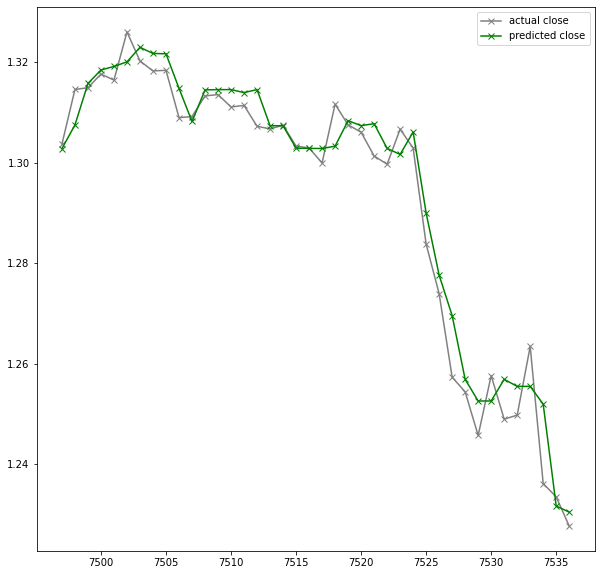

In [274]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
line1 = plt.plot(df_t.test, label = 'actual close', marker='x', color='grey')
#include actual high and low range

line2 = plt.plot(df_t.pred, label = 'predicted close', marker='x', color='g')
plt.legend()
plt.show()
 

In [275]:
#include actual high and low range
df_t['test_high']=df_raw1.iloc[-40:,1:2].shift(-1)
df_t['test_low']=df_raw1.iloc[-40:,2:3].shift(-1)
df_t

,test,pred,test_high,test_low
7497,1.30370,1.302787,NaN,NaN
7498,1.31456,1.307504,1.31566,1.30352
7499,1.31491,1.315755,1.32109,1.30878
7500,1.31762,1.318438,1.31972,1.31104
7501,1.31642,1.319134,1.32101,1.31269
7502,1.32601,1.320061,1.32740,1.31200
7503,1.32023,1.322939,1.32986,1.31753
7504,1.31825,1.321722,1.32141,1.31570
7505,1.31837,1.321663,1.32249,1.31592
7506,1.30896,1.314783,1.31839,1.30668


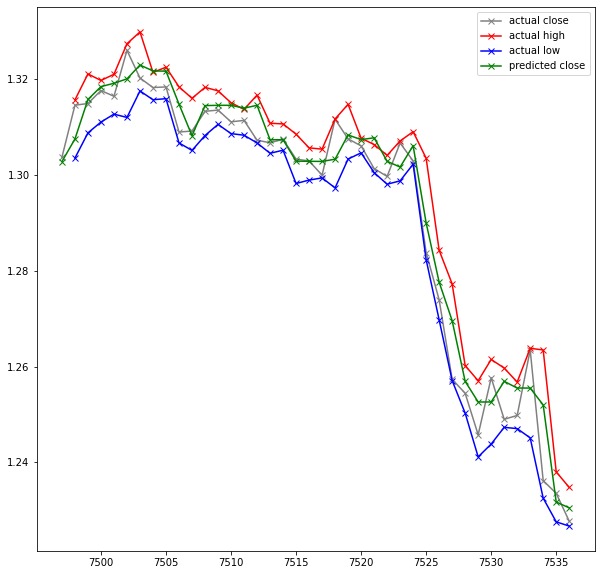

In [276]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
line1 = plt.plot(df_t.test, label = 'actual close', marker='x', color='grey')
#include actual high and low range
line1_h = plt.plot(df_t.test_high, label = 'actual high', marker='x', color='r')
line1_l = plt.plot(df_t.test_low, label = 'actual low', marker='x', color='b')

line2 = plt.plot(df_t.pred, label = 'predicted close', marker='x', color='g')
plt.legend()
plt.show()
 

In [277]:
# clears the model after a run so you can contrast new runs.
# predictor.unpersist_models('ag_predict_interval')
# predictor.save_space()
# predictor.delete_models(models_to_keep='best', dry_run=False)
%rm -rf AutogluonModels, ag_predict_interval
!ls

agModels-predictClose
EURUSD_H3_197101040000_202205090300.csv
GBPUSD_Daily_199305120000_202205090000.csv
sample_data
